<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Box Plots**


Estimated time needed: **45** minutes


In this lab, you will focus on the visualization of data. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize data composition and comparisons using box plots.


### Setup: Connecting to the Database


#### 1. Download the Database File


In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite

--2026-02-17 20:31:13--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 211415040 (202M) [application/octet-stream]
Saving to: ‘survey-results-public.sqlite’

survey-results-publ 100%[===================>] 201.62M  35.1MB/s    in 5.6s    

2026-02-17 20:31:21 (36.0 MB/s) - ‘survey-results-public.sqlite’ saved [211415040/211415040]



#### 2. Connect to the Database


**Install the needed libraries**


In [2]:
!pip install pandas

In [3]:
!pip install matplotlib

In [4]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database
conn = sqlite3.connect('survey-results-public.sqlite')


## Demo: Basic SQL Queries


#### Demo 1: Count the Number of Rows in the Table


In [5]:
QUERY = "SELECT COUNT(*) FROM main"
df = pd.read_sql_query(QUERY, conn)
print(df)


   COUNT(*)
0     65437


#### Demo 2: List All Tables


In [6]:
QUERY = """
SELECT name as Table_Name 
FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


#### Demo 3: Group Data by Age


In [7]:
QUERY = """
SELECT Age, COUNT(*) as count 
FROM main 
GROUP BY Age 
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)


                  Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568


## Visualizing Data


### Task 1: Visualizing the Distribution of Data


**1. Box Plot of `CompTotal` (Total Compensation)**


Use a box plot to analyze the distribution and outliers in total compensation.


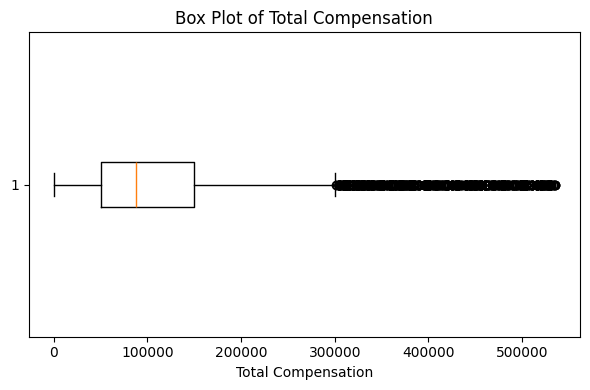

In [8]:
QUERY = """
SELECT CompTotal
FROM main
WHERE CompTotal IS NOT NULL;
"""
df_comp_total = pd.read_sql_query(QUERY, conn)

upper  = df_comp_total['CompTotal'].quantile(0.75) + 1.5 * (df_comp_total['CompTotal'].quantile(0.75) - df_comp_total['CompTotal'].quantile(0.25)) # set upper limit of interquartile range
df_comp_total = df_comp_total[df_comp_total['CompTotal'] <= upper] # exclude CompTotal where it is above the upper limit of the interquartile range

# create box plot
plt.figure(figsize=(6, 4))
plt.boxplot(df_comp_total['CompTotal'], vert=False)
plt.xlabel('Total Compensation')
plt.title('Box Plot of Total Compensation')
plt.tight_layout()
plt.show()


**2. Box Plot of Age (converted to numeric values)**


Convert the `Age` column into numerical values and visualize the distribution.


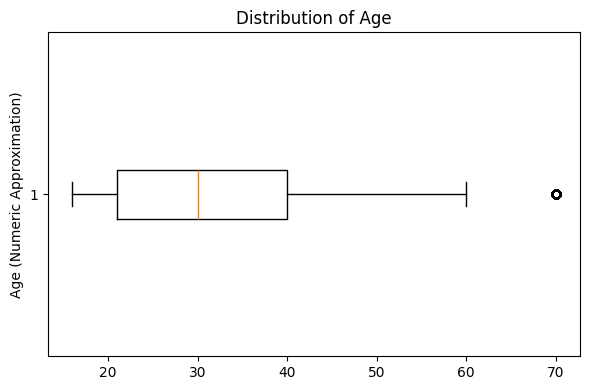

In [9]:
QUERY = """
SELECT Age
FROM main
WHERE Age IS NOT NULL
    AND Age != 'Prefer not to say';
"""
df_age = pd.read_sql_query(QUERY, conn)

age_mapping = {
    'Under 18 years old': 16,
    '18-24 years old': 21,
    '25-34 years old': 30,
    '35-44 years old': 40,
    '45-54 years old': 50,
    '55-64 years old': 60,
    '65 years or older': 70
}

df_age['Age_numeric'] = df_age['Age'].map(age_mapping) # create new column with mapped age

# create box plot
plt.figure(figsize=(6, 4))
plt.boxplot(df_age['Age_numeric'], showfliers=True, vert=False)
plt.ylabel('Age (Numeric Approximation)')
plt.title('Distribution of Age')
plt.tight_layout()
plt.show()


### Task 2: Visualizing Relationships in Data


**1. Box Plot of `CompTotal` Grouped by Age Groups:**


Visualize the distribution of compensation across different age groups.


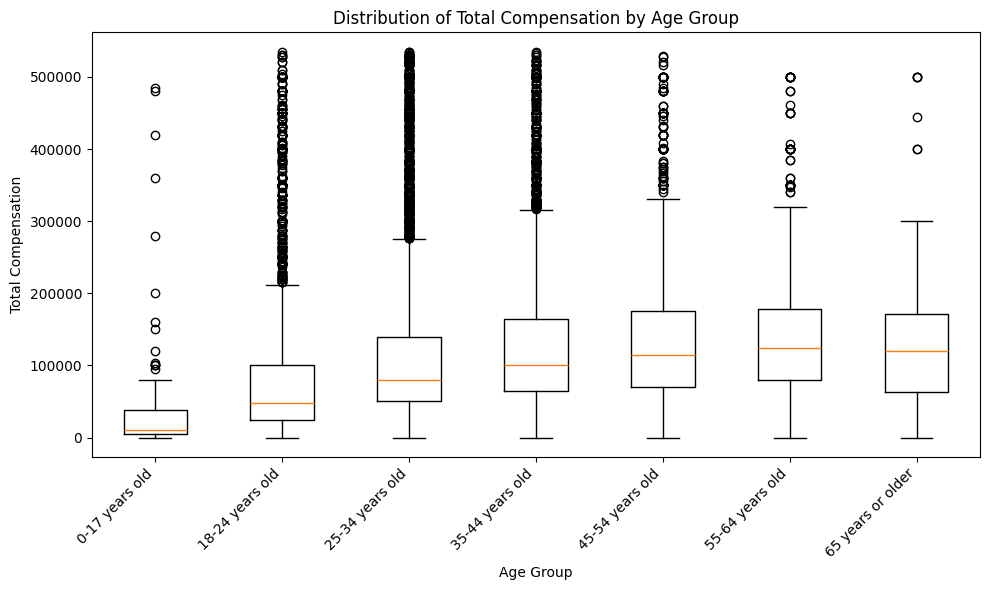

In [10]:
QUERY = """
SELECT Age, CompTotal
FROM main
WHERE Age IS NOT NULL
  AND Age != 'Prefer not to say'
  AND CompTotal IS NOT NULL;
"""
df_age_comp = pd.read_sql_query(QUERY, conn)

upper  = df_age_comp['CompTotal'].quantile(0.75) + 1.5 * (df_age_comp['CompTotal'].quantile(0.75) - df_age_comp['CompTotal'].quantile(0.25)) # set upper limit of interquartile range
df_age_comp = df_age_comp[df_age_comp['CompTotal'] <= upper] # exclude CompTotal where it is above the upper limit of the interquartile range

df_age_comp['Age'] = df_age_comp['Age'].replace({
    'Under 18 years old':
        '0-17 years old'
})

age_groups = [
    '0-17 years old',
    '18-24 years old',
    '25-34 years old',
    '35-44 years old',
    '45-54 years old',
    '55-64 years old',
    '65 years or older'
]

df_age_comp = [
    df_age_comp.loc[df_age_comp['Age'] == age, 'CompTotal']
    for age in age_groups
]

#create boxplot
plt.figure(figsize=(10, 6))

plt.boxplot(
    df_age_comp,
    tick_labels=age_groups,
    showfliers=True
)

plt.xlabel('Age Group')
plt.ylabel('Total Compensation')
plt.title('Distribution of Total Compensation by Age Group')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**2. Box Plot of `CompTotal` Grouped by Job Satisfaction (`JobSatPoints_6`):**


Examine how compensation varies based on job satisfaction levels.


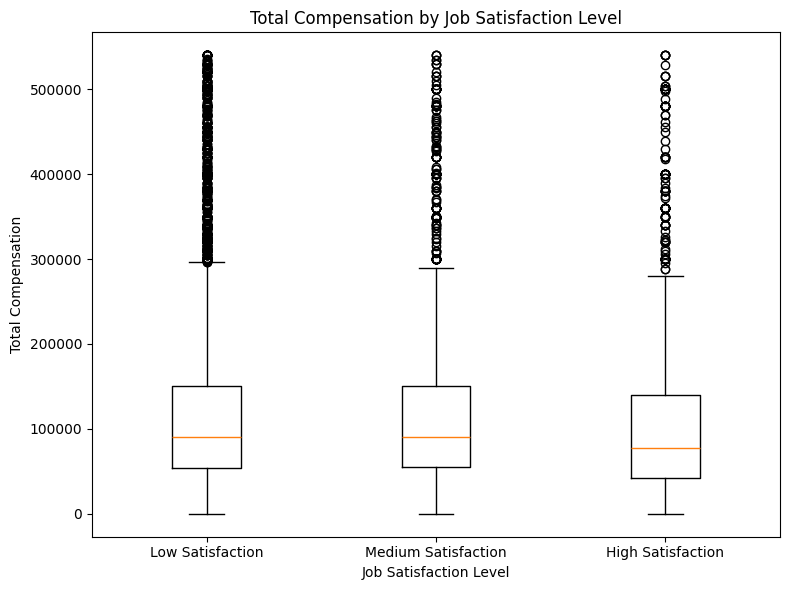

In [11]:
QUERY = """
SELECT JobSatPoints_6, CompTotal
FROM main
WHERE JobSatPoints_6 IS NOT NULL
  AND CompTotal IS NOT NULL;
"""
df_satis_comp = pd.read_sql_query(QUERY, conn)

upper = df_satis_comp['CompTotal'].quantile(0.75) + 1.5 * (df_satis_comp['CompTotal'].quantile(0.75) - df_satis_comp['CompTotal'].quantile(0.25)) # set upper limit of interquartile range
df_satis_comp = df_satis_comp[df_satis_comp['CompTotal'] <= upper] # exclude CompTotal where it is above the upper limit of the interquartile range

# create bins
bins = [0, 33, 66, 100]
labels = ['Low Satisfaction', 'Medium Satisfaction', 'High Satisfaction']

df_satis_comp['JobSatGroup'] = pd.cut(
    df_satis_comp['JobSatPoints_6'],
    bins=bins,
    labels=labels,
    include_lowest=True
)

# create boxplot
df_satis_comp = [
    df_satis_comp.loc[df_satis_comp['JobSatGroup'] == label, 'CompTotal']
    for label in labels
]

plt.figure(figsize=(8, 6))
plt.boxplot(
    df_satis_comp,
    tick_labels=labels,
    showfliers=True
)

plt.xlabel('Job Satisfaction Level')
plt.ylabel('Total Compensation')
plt.title('Total Compensation by Job Satisfaction Level')
plt.tight_layout()
plt.show()

### Task 3: Visualizing the Composition of Data


**1. Box Plot of `ConvertedCompYearly` for the Top 5 Developer Types:**


Analyze compensation across the top 5 developer roles.


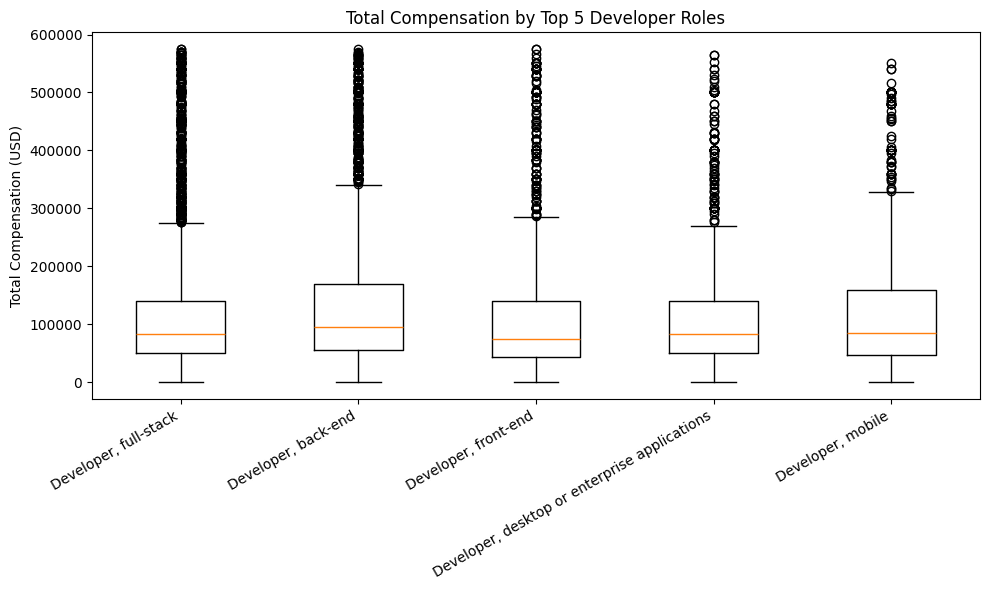

In [12]:
QUERY = """
SELECT DevType, CompTotal
FROM main
WHERE CompTotal IS NOT NULL
    AND DevType IS NOT NULL;
"""
df_dev_comp = pd.read_sql_query(QUERY, conn)

dev_counts  = (
    df_dev_comp['DevType']
    .value_counts()
    .head(5)
    .index
)

df_dev_comp = df_dev_comp[df_dev_comp['DevType'].isin(dev_counts)] # restrict dataset to top 5 roles

upper = df_dev_comp['CompTotal'].quantile(0.75) + 1.5 * (df_dev_comp['CompTotal'].quantile(0.75) - df_dev_comp['CompTotal'].quantile(0.25)) # set upper limit of interquartile range
df_dev_comp = df_dev_comp[df_dev_comp['CompTotal'] <= upper] # exclude CompTotal where it is above the upper limit of the interquartile range

# create boxplot
df_dev_comp = [
    df_dev_comp.loc[df_dev_comp['DevType'] == dev, 'CompTotal']
    for dev in dev_counts
]

plt.figure(figsize=(10, 6))
plt.boxplot(
    df_dev_comp,
    tick_labels=dev_counts,
    showfliers=True
)

plt.xticks(rotation=30, ha='right')
plt.ylabel('Total Compensation (USD)')
plt.title('Total Compensation by Top 5 Developer Roles')
plt.tight_layout()
plt.show()

**2. Box Plot of `CompTotal` for the Top 5 Countries:**


Analyze compensation across respondents from the top 5 countries.


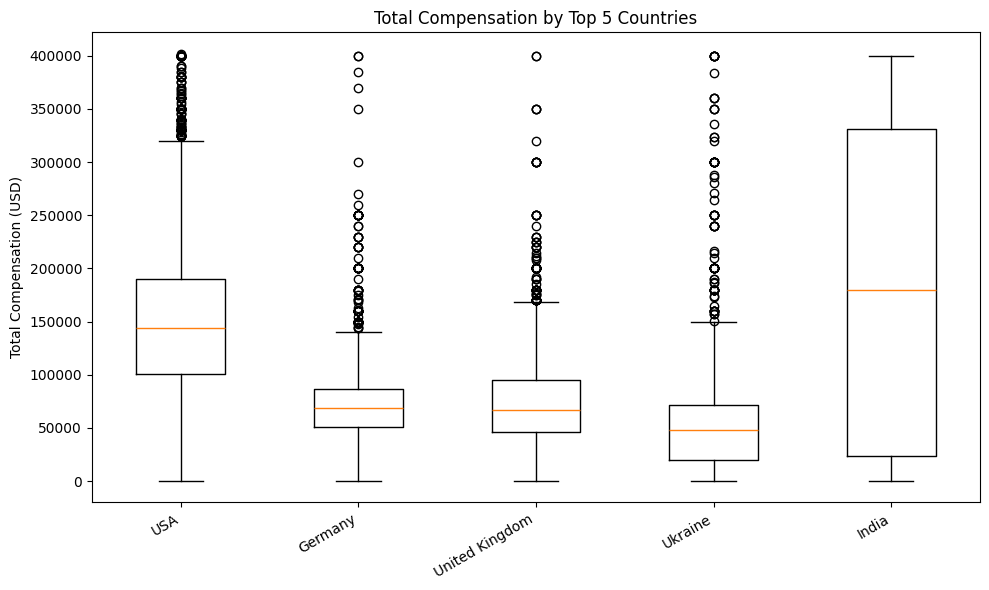

In [13]:
QUERY = """
SELECT Country, CompTotal
FROM main
WHERE CompTotal IS NOT NULL
    AND Country IS NOT NULL;
"""
df_country_comp = pd.read_sql_query(QUERY, conn)

# rename countries
df_country_comp['Country'] = df_country_comp['Country'].replace({
    'United Kingdom of Great Britain and Northern Ireland':
        'United Kingdom',
    'United States of America':
        'USA'
})

country_counts  = (
    df_country_comp['Country']
    .value_counts()
    .head(5)
    .index
)

df_country_comp = df_country_comp[df_country_comp['Country'].isin(country_counts)] # restrict dataset to top 5 roles

upper = df_country_comp['CompTotal'].quantile(0.75) + 1.5 * (df_country_comp['CompTotal'].quantile(0.75) - df_country_comp['CompTotal'].quantile(0.25)) # set upper limit of interquartile range
df_country_comp = df_country_comp[df_country_comp['CompTotal'] <= upper] # exclude CompTotal where it is above the upper limit of the interquartile range

# create boxplot
df_country_comp = [
    df_country_comp.loc[df_country_comp['Country'] == country, 'CompTotal']
    for country in country_counts
]

plt.figure(figsize=(10, 6))
plt.boxplot(
    df_country_comp,
    tick_labels=country_counts,
    showfliers=True
)

plt.xticks(rotation=30, ha='right')
plt.ylabel('Total Compensation (USD)')
plt.title('Total Compensation by Top 5 Countries')
plt.tight_layout()
plt.show()

### Task 4: Visualizing Comparison of Data


**1. Box Plot of CompTotal Across Employment Types:**


Analyze compensation for different employment types.


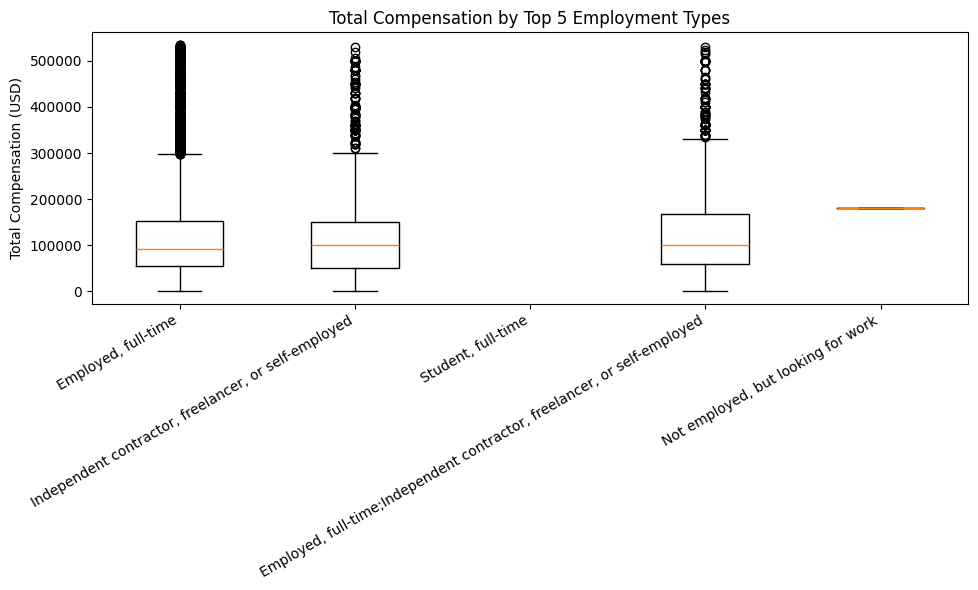

In [14]:
QUERY = """
SELECT Employment, CompTotal
FROM main
WHERE Employment IS NOT NULL
    AND Employment IS NOT NULL;
"""
df_emp_comp = pd.read_sql_query(QUERY, conn)

emp_counts  = (
    df_emp_comp['Employment']
    .value_counts()
    .head(5)
    .index
)

ddf_emp_comp = df_emp_comp[df_emp_comp['Employment'].isin(emp_counts)] # restrict dataset to top 5 roles

upper = df_emp_comp['CompTotal'].quantile(0.75) + 1.5 * (df_emp_comp['CompTotal'].quantile(0.75) - df_emp_comp['CompTotal'].quantile(0.25)) # set upper limit of interquartile range
df_emp_comp = df_emp_comp[df_emp_comp['CompTotal'] <= upper] # exclude CompTotal where it is above the upper limit of the interquartile range

# create boxplot
df_emp_comp = [
    df_emp_comp.loc[df_emp_comp['Employment'] == emp, 'CompTotal']
    for emp in emp_counts
]

plt.figure(figsize=(10, 6))
plt.boxplot(
    df_emp_comp,
    tick_labels=emp_counts,
    showfliers=True
)

plt.xticks(rotation=30, ha='right')
plt.ylabel('Total Compensation (USD)')
plt.title('Total Compensation by Top 5 Employment Types')
plt.tight_layout()
plt.show()

**2. Box Plot of `YearsCodePro` by Job Satisfaction (`JobSatPoints_6`):**


Examine the distribution of professional coding years by job satisfaction levels.


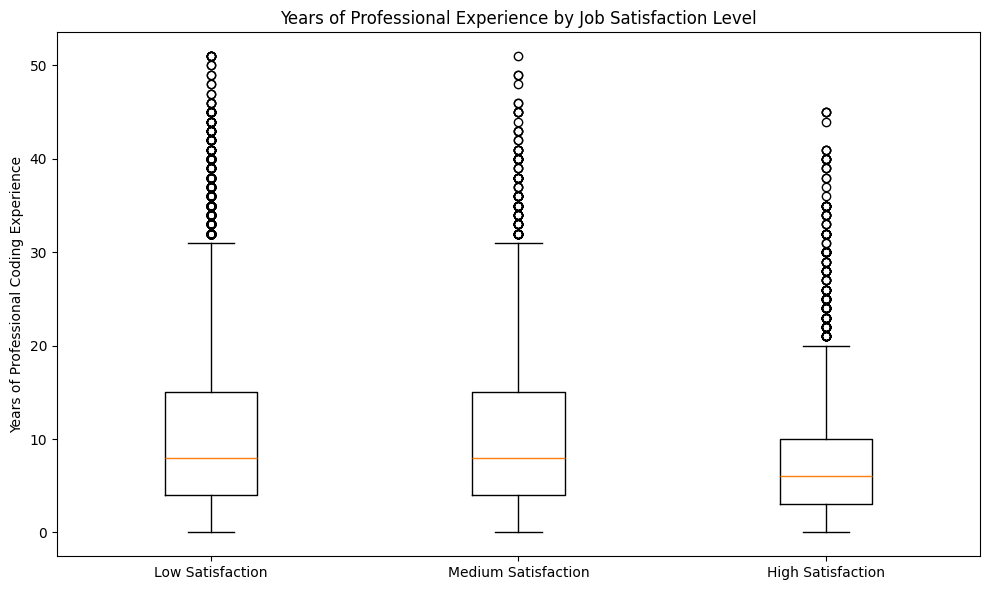

In [15]:
QUERY = """
SELECT CAST(YearsCodePro AS float) AS YearsCodePro, JobSatPoints_6
FROM
(
SELECT CASE YearsCodePro
            WHEN 'Less than 1 year' THEN '0'
            WHEN 'More than 50 years' THEN 51
            ELSE YearsCodePro
            END YearsCodePro,
    JobSatPoints_6
       FROM main
    WHERE YearsCodePro IS NOT NULL
    AND JobSatPoints_6 IS NOT NULL
);
"""
df_years_satis = pd.read_sql_query(QUERY, conn)

df_years_satis = df_years_satis.dropna() # remove nulls

bins = [0, 33, 67, 100]
labels = ['Low Satisfaction', 'Medium Satisfaction', 'High Satisfaction']

df_years_satis['JobSatGroup'] = pd.cut(
    df_years_satis['JobSatPoints_6'],
    bins=bins,
    labels=labels,
    include_lowest=True
)

# create boxplot
df_years_satis = [
    df_years_satis.loc[df_years_satis['JobSatGroup'] == label, 'YearsCodePro']
    for label in labels
]

plt.figure(figsize=(10, 6))
plt.boxplot(
    df_years_satis,
    tick_labels=labels,
    showfliers=True
)

plt.ylabel('Years of Professional Coding Experience')
plt.title('Years of Professional Experience by Job Satisfaction Level')
plt.tight_layout()
plt.show()

### Final Step: Close the Database Connection


After completing the lab, close the connection to the SQLite database:


In [16]:
conn.close()

## Summary


In this lab, you used box plots to visualize various aspects of the dataset, focusing on:

- Visualize distributions of compensation and age.

- Explore relationships between compensation, job satisfaction, and professional coding experience.

- Analyze data composition across developer roles and countries.

- Compare compensation across employment types and satisfaction levels.

Box plots provided clear insights into the spread, outliers, and central tendencies of various features in the dataset.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-07|1.2|Madhusudan Moole|Reviewed and updated lab|                                                                                      
|2024-10-06|1.0|Raghul Ramesh|Created lab|-->


Copyright © IBM Corporation. All rights reserved.
